In [1]:
import numpy as np              #for arranging the data
import pandas as pd             #for reading the data from csv file
import os
import cv2                      #for reading and processing the image


In [2]:
from sklearn.decomposition import PCA           #PCA

 # PREPROCESSING THE DATA

In [3]:
main_folder = r"D:\AI\epoch learning phase tasks\archive (3)\lfw-deepfunneled\lfw-deepfunneled"

### loading and saving the unlabelled data as an numpy array of shape (13000,2304) after reshaping

In [4]:


def load_unlabbled(res,main_folder):
    data = []
    
    for image_folder_name in os.listdir(main_folder):
        image_path = os.path.join(main_folder,image_folder_name)

        for images in os.listdir(image_path):
            final_path = os.path.join(image_path,images)

            img = cv2.imread(final_path,cv2.IMREAD_GRAYSCALE) #converting them to grayscale
            img = cv2.resize(img,(res,res))                   #resizing them to required resolution

            # Normalize pixel values to [0, 1]
            img = img.astype(np.float32)/255


            data.append(img)
        
    return data




X_unlabelled = load_unlabbled(48,main_folder) #chose 48*48 as the res to match the resolution with the labelled data
# print(X_unlabelled)


In [5]:
# print(X_unlabelled)
X_unlabelled = np.array(X_unlabelled)
X_unlabelled = X_unlabelled.reshape(X_unlabelled.shape[0],-1)
print(X_unlabelled)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.05490196 0.02352941 0.02352941 ... 0.00784314 0.         0.        ]
 [0.         0.         0.         ... 0.12941177 0.01176471 0.00392157]
 [0.06666667 0.07058824 0.08627451 ... 0.03529412 0.03529412 0.01176471]]


### LOADING AND SAVING THE LABELLED DATA IN THE SIMILAR FORMAT

In [6]:
def load_labelled_dataset(csv_file):


    # Load labeled data from CSV
    labelled_file = pd.read_csv(csv_file)
    Y = labelled_file["emotion"].to_numpy()


    X = labelled_file["pixels"].to_numpy()
    # Convert pixel string to numpy array
    X = np.array([np.fromstring(pixel_string,sep=" ") for pixel_string in X],dtype = np.float32)
    # Normalize pixel values to [0, 1]
    X = X/255


    return X,Y




csv_file = r"D:\AI\epoch learning phase tasks\archive (2)\ckextended.csv"
X,Y = load_labelled_dataset(csv_file)




print(X.shape,type(X))
print()
print(X)



(920, 2304) <class 'numpy.ndarray'>

[[0.14117648 0.15294118 0.13725491 ... 0.75686276 0.9843137  0.99215686]
 [0.34509805 0.2901961  0.07450981 ... 0.19607843 0.10588235 0.12941177]
 [0.03529412 0.00784314 0.01568628 ... 0.         0.         0.        ]
 ...
 [0.29803923 0.15686275 0.12156863 ... 0.32941177 0.33333334 0.34509805]
 [0.44705883 0.34117648 0.0627451  ... 1.         0.9882353  0.96862745]
 [0.39607844 0.4        0.3882353  ... 0.39215687 0.24313726 0.23137255]]


 # PCA

In [7]:
#VERY IMPORTANT -------->>> I FORGOT TO DO THE MEAN CENTERING OF THE DATA BEFORE DOING PCA ANALYSIS, DOING IT IS IMP SO THE AXES ARE PROPERLY ALIGNED AND NOT SHIFTED

# Compute and subtract mean for centering data
mean_of_unlabelled = np.mean(X_unlabelled,axis=0)
X_unlabelled -= mean_of_unlabelled


#performing manual svd for interpreting values of k 
# Perform manual Singular Value Decomposition (SVD)
U,S,Vt = np.linalg.svd(X_unlabelled,full_matrices=False)

### Visualizing the variance vs the number of components to optimally select it and to visualize the first few eigen faces

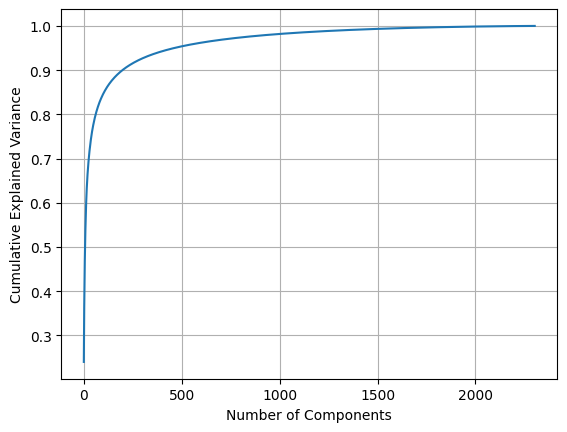

In [8]:
explained_variance = (S ** 2) / (X_unlabelled.shape[0] - 1)
explained_variance_ratio = explained_variance / explained_variance.sum()

import matplotlib.pyplot as plt
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

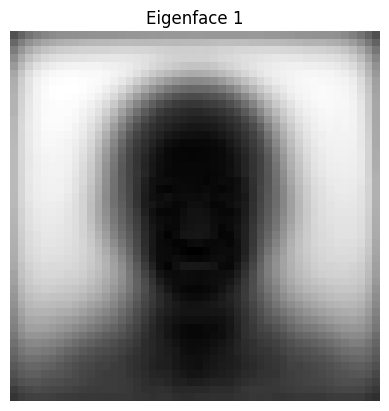

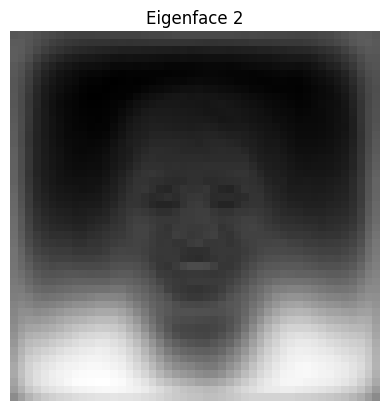

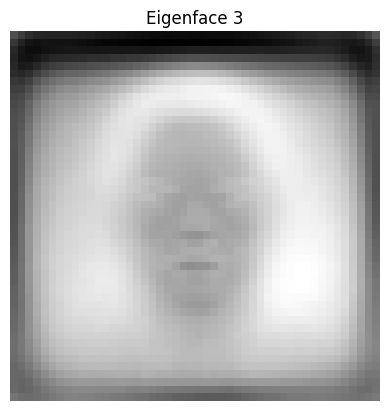

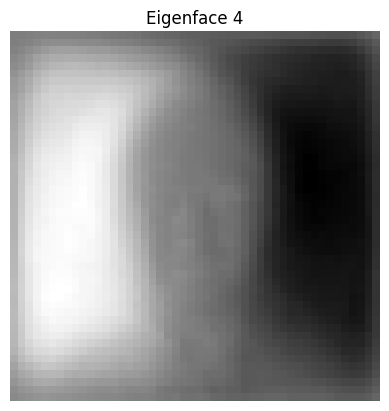

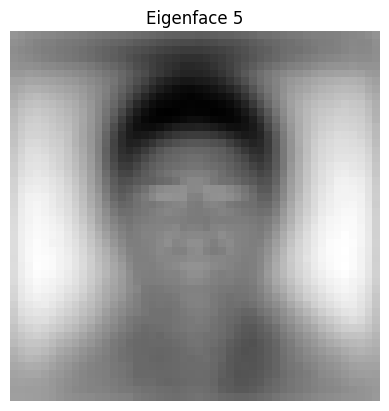

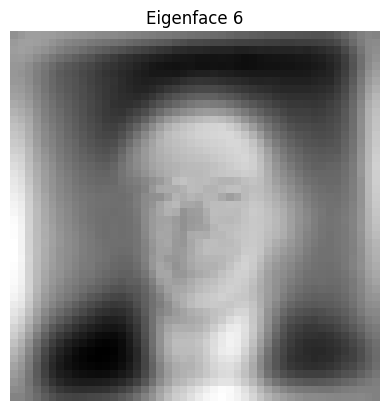

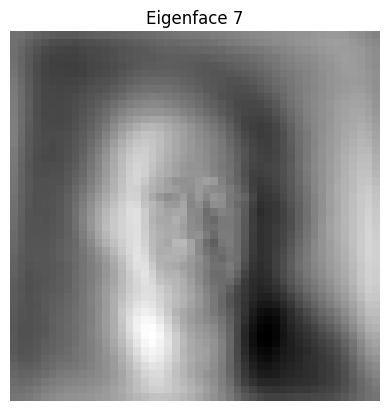

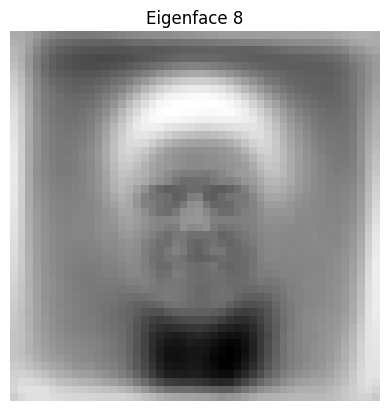

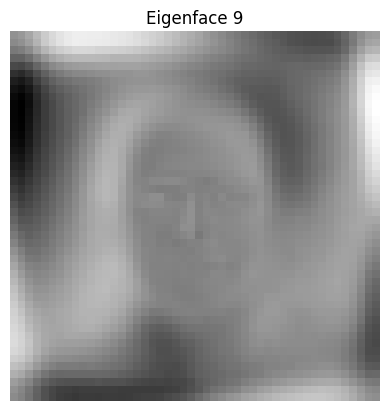

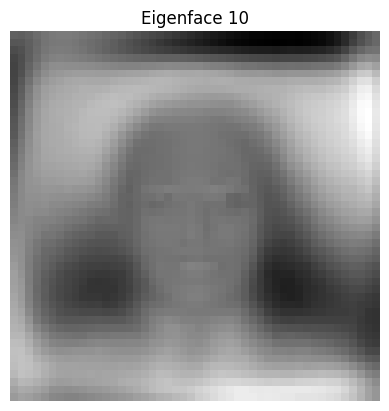

In [9]:
eigenfaces = Vt[:10]  # first 10 eigenfaces
for i in range(10):
    plt.imshow(eigenfaces[i].reshape(48,48), cmap='gray')
    plt.title(f'Eigenface {i+1}')
    plt.axis('off')
    plt.show()


### Now we perform the pca


In [10]:
#now we can perform pca
k = 200         # explanation in the report file

# Apply PCA for dimensionality reduction
pca = PCA(n_components = k,svd_solver='randomized')          
# Fit PCA and transform the data
X_unlabelled_pca = pca.fit_transform(X_unlabelled)
print(pca.explained_variance_ratio_)

[0.23996659 0.07572924 0.04788012 0.04184748 0.03551316 0.02808992
 0.02582479 0.02260107 0.01986907 0.01828923 0.01682062 0.01509931
 0.01292705 0.01224174 0.01033053 0.00971778 0.00863692 0.00849548
 0.00779575 0.00682138 0.00647289 0.00633359 0.00583138 0.00540861
 0.00529106 0.0051409  0.00487399 0.00451476 0.00442546 0.00418715
 0.00401829 0.00395193 0.00383329 0.00374982 0.0035723  0.00350105
 0.0033654  0.00324603 0.00317211 0.00314709 0.00290714 0.00276361
 0.0027003  0.0026847  0.00258403 0.0024793  0.00242908 0.00224539
 0.00222205 0.00221589 0.00216226 0.00213268 0.00207994 0.00206852
 0.00198914 0.00196914 0.00185047 0.00181912 0.00175479 0.00173835
 0.00170508 0.00168743 0.00164746 0.0016301  0.0015877  0.00155253
 0.00152661 0.00145504 0.00144266 0.00142939 0.00139089 0.00138328
 0.00135611 0.0013473  0.00128874 0.00127703 0.00126532 0.00124792
 0.00121311 0.00120818 0.00119551 0.00116546 0.00112712 0.00111212
 0.00109691 0.00106594 0.001043   0.00103811 0.00102619 0.0010

### # Now we will use the directions or the face space learned from the larger dataset to transfrom the smaller dataset into it and then perfomr SVM

In [11]:

# from collections import Counter


# # Step 2: Count the samples per class
# class_counts = Counter(Y)
# print("Original class distribution:", class_counts)

# # Step 3: Choose the minimum class count for balanced sampling
# min_count = min(class_counts.values())

# # Step 4: Collect min_count samples per class
# def create_balanced_subset(X, Y, samples_per_class):
#     X_balanced = []
#     Y_balanced = []
    
#     for cls in np.unique(Y):
#         indices = np.where(Y == cls)[0]
#         np.random.shuffle(indices)
#         selected = indices[:samples_per_class]
#         X_balanced.extend(X[selected])
#         Y_balanced.extend(Y[selected])
    
#     return np.array(X_balanced), np.array(Y_balanced)

# X_balanced, Y_balanced = create_balanced_subset(X, Y, min_count)

# X = X_balanced
# Y = Y_balanced


In [12]:
# Now we will centerize the labbled data also by the same mean of unlabelled dataset and transform the data to the face subspace


X = X - mean_of_unlabelled
X = pca.transform(X)

In [13]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
# The SVM Model
from sklearn.svm import SVC
# Print precision, recall, f1-score for each class
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [14]:
# Split data into training and testing sets
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=40,stratify=Y)


# Initialize the SVM classifier
svm_classifier = SVC(kernel='rbf',gamma=0.001 ,C=250)
# Train the SVM classifier
svm_classifier.fit(X_train,Y_train)
# Evaluate accuracy on the test set
acc = svm_classifier.score(X_test,Y_test)
print(acc)

Y_predict = svm_classifier.predict(X_test)

0.8804347826086957


In [15]:
label_names = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral','Contempt']



accuracy = accuracy_score(Y_test, Y_predict)
print(f"✅ Overall Accuracy: {accuracy * 100:.4f}%")



print("📊 Classification Report:")
# Print precision, recall, f1-score for each class
print(classification_report(Y_test, Y_predict, target_names=label_names))


✅ Overall Accuracy: 88.0435%
📊 Classification Report:
              precision    recall  f1-score   support

       Angry       0.54      0.54      0.54        13
     Disgust       0.85      0.61      0.71        18
        Fear       0.75      0.38      0.50         8
       Happy       0.90      0.90      0.90        21
         Sad       0.67      0.25      0.36         8
    Surprise       1.00      0.88      0.94        25
     Neutral       0.89      0.99      0.94       178
    Contempt       1.00      0.40      0.57         5

    accuracy                           0.88       276
   macro avg       0.82      0.62      0.68       276
weighted avg       0.88      0.88      0.87       276



We can also plot the heatmap of the confusion matrix

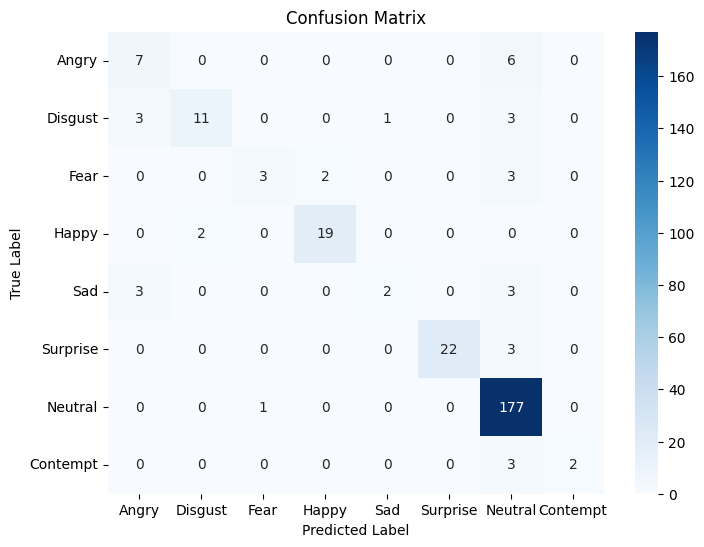

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_predict)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_names, yticklabels=label_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
